# Vision and Perception project

### One time run for dataset division

Here a dataset division in training-validation-test sets is applied. The result are three zip, one for each set.


In [ ]:
# Go in the folder where the zip file of the dataset is
%cd '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/'

/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset


In [ ]:
# Unzip the dataset (zip file) in a temporary folder on the virtual machine.
!unzip ./color.zip -d /content/localdata

In [ ]:
##### Create Train - Val - Test folders #####
# Takes the unzipped files of the dataset from the root_dir (files should be
# divided into different subfolders - one for each class) and creates a folder
# for each set in the root_root_dir containing the split part of files.
# For each class, files are randomly divided.
#####
import os
import numpy as np
import shutil
import random
root_root_dir = '/content/localdata/'
root_dir = '/content/localdata/color' 
classes_dir = []
for i in os.listdir(root_dir):
    classes_dir.append(i)

# Splitting ratios (default: 60% training, 20% validation, 20% test)
val_ratio = 0.20
test_ratio = 0.20

for cls in classes_dir:
    print('/n****** CLASS ', cls, '******')
    print('> Creating class folders')
    
    os.makedirs(root_root_dir +'train/' + cls)
    os.makedirs(root_root_dir +'val/' + cls)
    os.makedirs(root_root_dir +'test/' + cls)
    

    src = root_dir + '/' + cls

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                              int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images in class ', cls, ': ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    for name in train_FileNames:
        shutil.copy(name, root_root_dir +'train/' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_root_dir +'val/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_root_dir +'test/' + cls)

In [ ]:
val_ratio = 0.20
test_ratio = 0.20
a = np.zeros(100)
train_FileNames, val_FileNames, test_FileNames = np.split(a,
                                                              [int(len(a)* (1 - (val_ratio + test_ratio))), 
                                                              int(len(a)* (1 - test_ratio))])

In [ ]:
# Zip the train-val-test sets again
%cd /content/localdata
!zip -r train.zip train/
!zip -r val.zip val/
!zip -r test.zip test/

In [ ]:
# Copy them on Drive
!cp train.zip '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/train.zip'
!cp val.zip '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/val.zip'
!cp test.zip '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/test.zip'

In [ ]:
!ls

 color			       test_14_plot_loss.png
 color.zip		       test_15_plot_accuracy.png
 grayscale.zip		       test_15_plot_loss.png
 images_distribution.jpg       test_nostro_simili_dataset.zip
 logs			      'Test Set ALPHA'
 master.zip		      'Test Set BETA'
'Nuove _simili_al_dataset'     test.zip
 PlantVillage-Dataset-master   train.zip
 test_14_plot_accuracy.png     val.zip


In [ ]:
!zip -r simili_dataset_NEW.zip 'Nuove_simili_al_dataset/'

### Prepare data for training

To speed up the training phase the data set is loaded locally on the Colab virtual machine.
So here the train, val and test zips are unzipped so to have all files available locally.
[To do just once when the VM is started]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to the folder where the zips are
%cd '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/'

/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset


In [ ]:
!unzip ./train.zip -d /content/localdata
!unzip ./val.zip -d /content/localdata
!unzip ./test.zip -d /content/localdata

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/e96e8f2f-060c-43f6-9d3f-7a3a64ca86d5___CREC_HLB 6404.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/9745c943-50a7-44ba-951e-55c49ba416c0___CREC_HLB 4276.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/6b8fdb38-59d6-45bc-9ec4-091be13845d1___UF.Citrus_HLB_Lab 0018.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/af714271-8190-4586-8fae-c59cfd664c19___CREC_HLB 4495.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/32a14cd6-07e3-49c9-b61d-67cf42f345e1___UF.Citrus_HLB_Lab 1604.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/423ef98a-2f31-44d6-b469-cb3d070e6fb4___CREC_HLB 6483.JPG  
  inflating: /content/localdata/test/Orange___Haunglongbing_(Citrus_greening)/1cd61f76-358f-40ff-8d67-ac61c575

### Data Augmentation

Test da fare 
- Mettere il flatten al posto del GlobalAveragePooling2D, a parità di configurazione e valutare le differenze
- Random crop applicato randomicamente
- Test senza random crop
- Valutare possibilità di usare porzioni nere nell'immagine

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os, datetime
from tensorflow import keras
import time
from tensorflow.keras import models, layers, optimizers, applications
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from skimage.transform import resize

In [2]:
%cd '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/'

/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project


In [ ]:
train_data_dir = '/content/localdata/train/'
val_data_dir = '/content/localdata/val/'
test_data_dir = '/content/localdata/test/'
target_image_size = (256,256)

In [ ]:
def random_crop(image):
    height, width = image.shape[:2]
    random_array = np.random.random(size=3);
    delta = int((width*0.5) * (1+random_array[0]*0.5))
    x = int(random_array[1] * (width-delta))
    y = int(random_array[2] * (height-delta))

    image_crop = image[y:y+delta, x:x+delta, 0:3]
    image_crop_resize = resize(image_crop, image.shape)
    return image_crop_resize


In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  brightness_range=[0.5,1.5],
                                                                  preprocessing_function=random_crop)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_generator.flow_from_directory(
                                                     directory=train_data_dir,
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     seed=123,
                                                     target_size=target_image_size
                                                     )

Found 32571 images belonging to 38 classes.


In [ ]:
val_data_gen = image_generator.flow_from_directory(
                                                    directory=val_data_dir,
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    seed=123,
                                                    target_size=target_image_size)

Found 10858 images belonging to 38 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(
                                                    directory=test_data_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=target_image_size)

Found 10876 images belonging to 38 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_gen = train_data_gen.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_data_gen = val_data_gen.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
classes_dict = train_data_gen.class_indices
to_classes_dict = {index: classe for classe, index in classes_dict.items()}

In [ ]:
to_classes_dict

In [ ]:
classes = {}
for i in os.listdir('./color/'):
  path = './color/' + i + '/'
  count = 0
  for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)):
        count += 1
  classes[i] = count
classes

{'Apple___Apple_scab': 630,
 'Apple___Black_rot': 621,
 'Apple___Cedar_apple_rust': 275,
 'Apple___healthy': 1645,
 'Blueberry___healthy': 1502,
 'Cherry_(including_sour)___Powdery_mildew': 1052,
 'Cherry_(including_sour)___healthy': 854,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 513,
 'Corn_(maize)___Common_rust_': 1192,
 'Corn_(maize)___Northern_Leaf_Blight': 985,
 'Corn_(maize)___healthy': 1162,
 'Grape___Black_rot': 1180,
 'Grape___Esca_(Black_Measles)': 1383,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Grape___healthy': 423,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Peach___Bacterial_spot': 2297,
 'Peach___healthy': 360,
 'Pepper,_bell___Bacterial_spot': 997,
 'Pepper,_bell___healthy': 1478,
 'Potato___Early_blight': 1000,
 'Potato___Late_blight': 1000,
 'Potato___healthy': 152,
 'Raspberry___healthy': 371,
 'Soybean___healthy': 5090,
 'Squash___Powdery_mildew': 1835,
 'Strawberry___Leaf_scorch': 1109,
 'Strawberry___healthy': 456,
 'Tomato___Bac

In [ ]:
count_tot = 0
for elem in classes:
  count_tot += classes[elem]
count_tot

54304

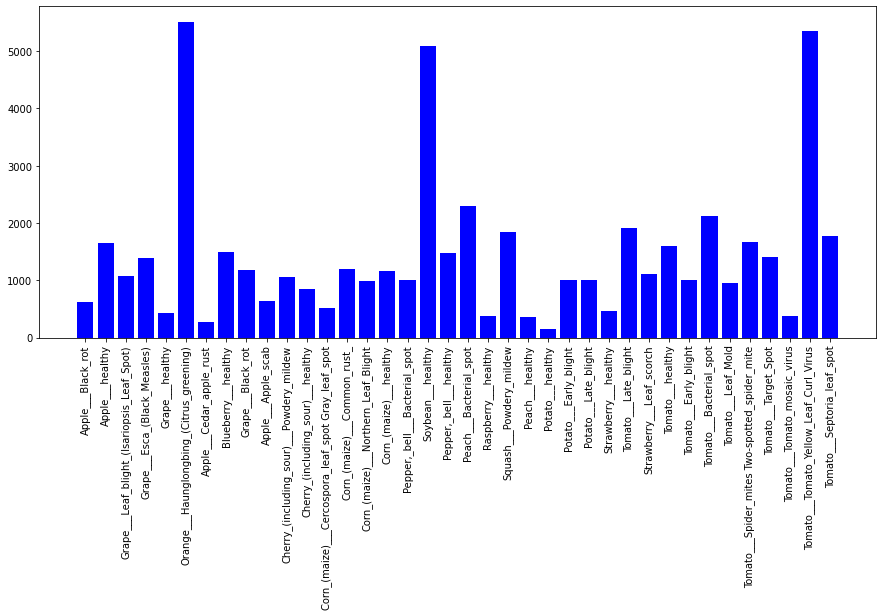

In [ ]:
plt.figure(figsize=(15,10))
x = [elem for elem in classes.keys()]
y = [n for n in classes.values()]
plt.gcf().subplots_adjust(bottom=0.42)
plt.bar(x, y, color='b')
plt.xticks(x, classes.keys(), rotation='vertical')
plt.savefig('/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/images_distribution.jpg')

### Model definition



In [ ]:
resnet = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet.summary()

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
img_height = 256
img_width = 256
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.Normalization(axis=-1),
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    
    layers.experimental.preprocessing.RandomCrop(100,100),
    
    layers.experimental.preprocessing.Resizing(img_height, img_width)
  ]
)

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256, 256, 3)))
  model.add(layers.MaxPooling2D())
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.BatchNormalization())
  
  model.add(layers.Flatten())


  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(38, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

### Tensorboard

In [ ]:
overwrite_log_dir = "" # To be used when model is restored and training restarted (leave empty when not used)

root = os.getcwd()
if(overwrite_log_dir==""):
  log_dir = os.path.join(root, "logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
log_dir

'/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/logs/20200920-081731'

In [ ]:
log_dir = '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/logs/20200920-081731'

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 56675.

In [ ]:
# Only if needed
!rm -rf '/content/drive/My Drive/Università/Vision and Perception/Project/logs'

In [8]:
!kill 13376

In [6]:
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 344.

### Training

In [ ]:
# FE = Feature Extraction
# FT = Fine Tuning
# HF = Horizontal flip
# RR = Rotation range
# RC = Random cropping
# GAP = Global Average Pooling
# FL = Flatten
# Dx = Dense layer with x units (ex. D512)

# Name template: test{X}_{nameModel}_{typeTraining}_{addedLayers}_{dataAugTechniques}.h5

path_model = '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/models/nostro_test56.h5'

callbacks = [
    TensorBoard(log_dir, update_freq = 50),
    EarlyStopping(monitor='val_accuracy', patience=4),
    ModelCheckpoint(path_model, save_best_only=True)
]

In [ ]:
history = model.fit(train_data_gen, epochs=40,
                    validation_data=val_data_gen,
                    shuffle=True,
                    max_queue_size = 512,
                    initial_epoch=12,
                    callbacks=callbacks)

Epoch 13/40
   1/1018 [..............................] - ETA: 0s - loss: 1.0933 - accuracy: 0.7188WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1018/1018 [==============================] - 725s 712ms/step - loss: 1.0769 - accuracy: 0.6815 - val_loss: 0.7843 - val_accuracy: 0.7698
Epoch 14/40
1018/1018 [==============================] - 720s 707ms/step - loss: 1.0047 - accuracy: 0.7031 - val_loss: 0.6781 - val_accuracy: 0.8016
Epoch 15/40
1018/1018 [==============================] - 736s 723ms/step - loss: 0.9393 - accuracy: 0.7218 - val_loss: 0.6209 - val_accuracy: 0.8174
Epoch 16/40
1018/1018 [==============================] - 705s 692ms/step - loss: 0.8930 - accuracy: 0.7373 - val_loss: 0.5600 - val_accuracy: 0.8402
Epoch 17/40
1018/1018 [=================

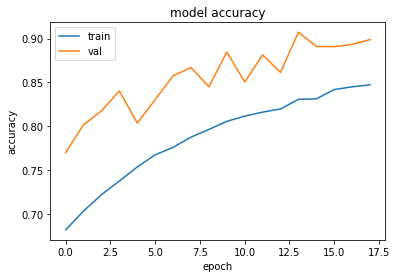

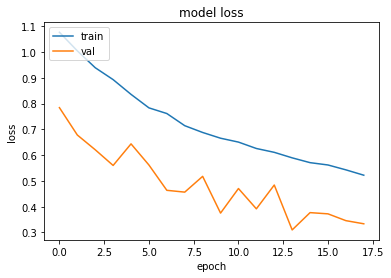

In [ ]:
# accuracy plot 4545454545454
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('test_56_plot_accuracy')
plt.show()


# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('test_56_plot_loss')
plt.show()

### Test phase

#### Test su dataset esterno

In [ ]:
!unzip /content/test_nostro_simili_dataset.zip -d /content/localdata/our_test/

In [ ]:
for folder in classes_dict.keys():
  if (not os.path.isdir( '/content/localdata/our_test/' + folder)):
    os.makedirs('/content/localdata/our_test/' + folder)

In [ ]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
                                                    directory='/content/localdata/our_test/',
                                                    batch_size=1,
                                                    target_size=(256,256),
                                                    shuffle=False)

Found 25 images belonging to 38 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [ ]:
model.evaluate(test_data_gen)

340/340 [==============================] - 24s 71ms/step - loss: 0.2779 - accuracy: 0.9350


[0.27792996168136597, 0.9349944591522217]

#### Test su set test

In [ ]:
image = keras.preprocessing.image.load_img('/content/IMG_20200826_161353_2.jpg')
image2 = resize(np.array(image), (256,256))
image3 = image2.reshape((1,256,256,3))
image3.shape

In [ ]:
predictions = model.predict(image3, batch_size = 1)
np.argmax(predictions)

In [ ]:
!ls

 dataset   models		    test1_resnet50V2_FE_D512_D512_HF_RR_RC.h5
 logs	  'Tabella lavoro.gsheet'   test1_resnet_feature_extraction.h5


In [ ]:
keras.models.save_model(model,'/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/models/nostro_test37_fine.h5')

In [ ]:
# Load a previously trained model
model = keras.models.load_model('/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/models/nostro_test56.h5')

In [ ]:
model.summary()

In [ ]:
model.evaluate(test_data_gen)

340/340 [==============================] - 42s 125ms/step - loss: 0.0893 - accuracy: 0.9779


[0.08929410576820374, 0.9779330492019653]

In [ ]:
!unzip '/content/drive/My Drive/Università/Magistrale/Vision and Perception/Project/dataset/test_nostro_simili_dataset.zip' -d /content/localdata/our_test

In [ ]:
for folder in classes_dict.keys():
  if (not os.path.isdir( '/content/localdata/our_test/' + folder)):
    os.makedirs('/content/localdata/our_test/' + folder)

In [ ]:
!rm -r /content/localdata/Nuove_simili_al_dataset/Peach___healthy

In [ ]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
                                                    directory='/content/localdata/our_test/',
                                                    batch_size=1,
                                                    target_size=(256,256),
                                                    shuffle=False)

Found 25 images belonging to 38 classes.


In [ ]:
test_data_gen.class_indices

In [ ]:
/content/localdata/Nuove_simili_al_dataset/Cherry_(including_sour)___Powdery_mildew
/content/localdata/Nuove_simili_al_dataset/Cherry_(including_sour)___healthy

In [ ]:
model.evaluate(test_data_gen)

25/25 [==============================] - 3s 109ms/step - loss: 34.7022 - accuracy: 0.0800


[34.702186584472656, 0.07999999821186066]

In [ ]:
import random

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

In [ ]:
y_pred_all = model.predict(test_data_gen)

In [ ]:
y_pred = np.argmax(y_pred_all, axis=-1)

In [ ]:
to_classes_dict

In [ ]:
print('Confusion Matrix')
conf_matrix=confusion_matrix(test_data_gen.classes, y_pred)
plt.figure(figsize = (30,12))
sn.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='coolwarm', xticklabels=classes_dict.keys(), yticklabels=classes_dict.keys())
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred))


In [ ]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    import itertools
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(to_classes_dict[int(t[0])])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


In [ ]:
to_classes_dict[0]

[0.95, 0.96, 0.95]
[1.0, 0.95, 0.98]
[0.93, 0.98, 0.96]
[0.97, 0.98, 0.98]
[1.0, 0.99, 1.0]
[0.96, 0.99, 0.97]
[0.99, 0.99, 0.99]
[0.86, 0.9, 0.88]
[1.0, 0.99, 0.99]
[0.94, 0.91, 0.93]
[0.99, 1.0, 1.0]
[0.91, 1.0, 0.95]
[1.0, 0.92, 0.96]
[1.0, 1.0, 1.0]
[0.99, 0.99, 0.99]
[1.0, 1.0, 1.0]
[0.99, 1.0, 0.99]
[1.0, 1.0, 1.0]
[0.95, 0.98, 0.97]
[0.99, 0.99, 0.99]
[1.0, 0.99, 1.0]
[0.96, 0.92, 0.94]
[0.88, 0.74, 0.81]
[1.0, 0.97, 0.99]
[1.0, 0.99, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[0.99, 1.0, 0.99]
[0.98, 0.97, 0.98]
[0.94, 0.83, 0.88]
[0.92, 0.94, 0.93]
[0.96, 0.98, 0.97]
[0.96, 0.96, 0.96]
[0.97, 0.93, 0.95]
[0.87, 0.92, 0.89]
[1.0, 1.0, 1.0]
[0.97, 0.95, 0.96]
[0.96, 1.0, 0.98]
plotMat: [[0.95, 0.96, 0.95], [1.0, 0.95, 0.98], [0.93, 0.98, 0.96], [0.97, 0.98, 0.98], [1.0, 0.99, 1.0], [0.96, 0.99, 0.97], [0.99, 0.99, 0.99], [0.86, 0.9, 0.88], [1.0, 0.99, 0.99], [0.94, 0.91, 0.93], [0.99, 1.0, 1.0], [0.91, 1.0, 0.95], [1.0, 0.92, 0.96], [1.0, 1.0, 1.0], [0.99, 0.99, 0.99], [1.0, 1.0, 1.0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


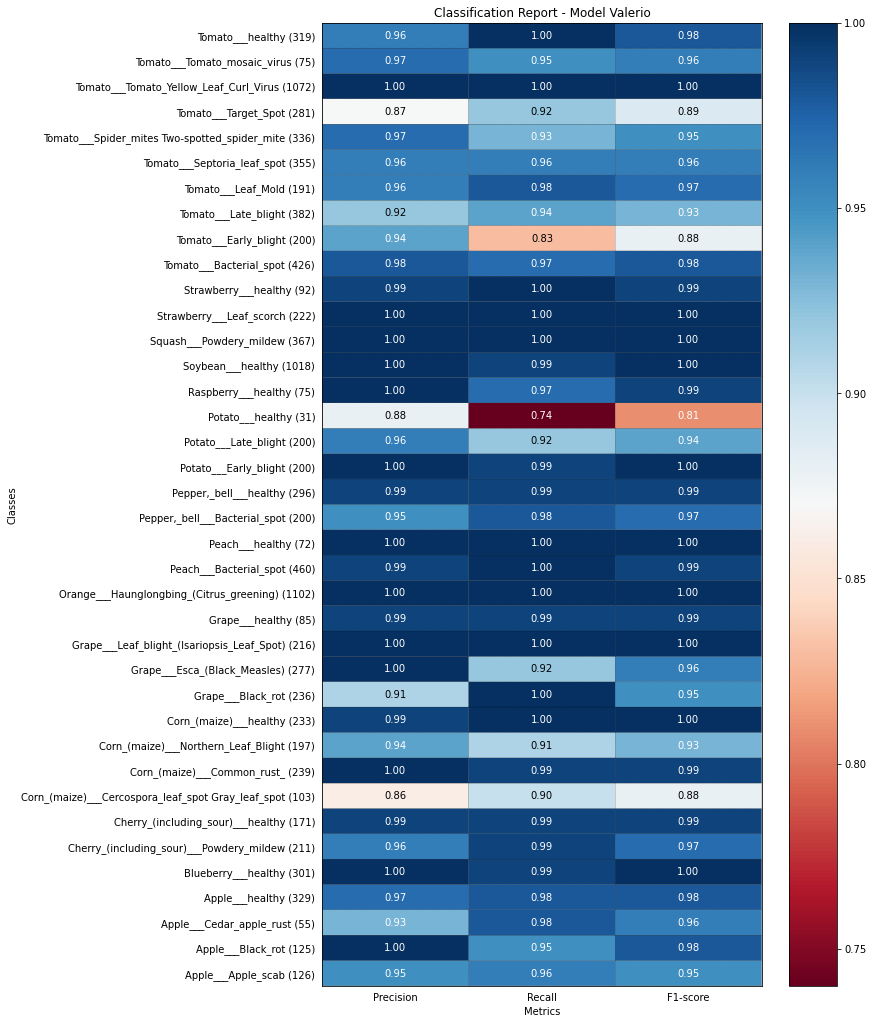

In [ ]:
plot_classification_report(classification_report(test_data_gen.classes, y_pred), "Classification Report - Model Valerio")